<a href="https://colab.research.google.com/github/giooooia/Machine-Learning/blob/analisi_bivariata/Data%20Analysis/analisi_bivariata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carichiamo i file e le librerie necessarie
!git clone -b "analisi_bivariata" https://github.com/giooooia/Machine-Learning.git
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("/content/Machine-Learning/Data Analysis")

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 60 (delta 25), reused 36 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (60/60), 730.62 KiB | 5.49 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [ ]:
# Carichiamo il dataset
df = pd.read_csv("/content/Machine-Learning/Data/divorce_df.csv")

# Analisi Bivariata

In [ ]:
#importiamo le funzioni necessarie all'analisi bivariata
from analisi_bivariata import *

# Distinguiamo le variabili quantitative da quelle qualitative
num_cols, cat_cols = get_column_types(df, 'divorced')

## Variabili quantitative
Iniziamo visualizzando una griglia di boxplot delle variabili numeriche rispetto al target divorced. Questa analisi può essere utile per individuare pattern visivi e differenze tra coppie divorziate e non.

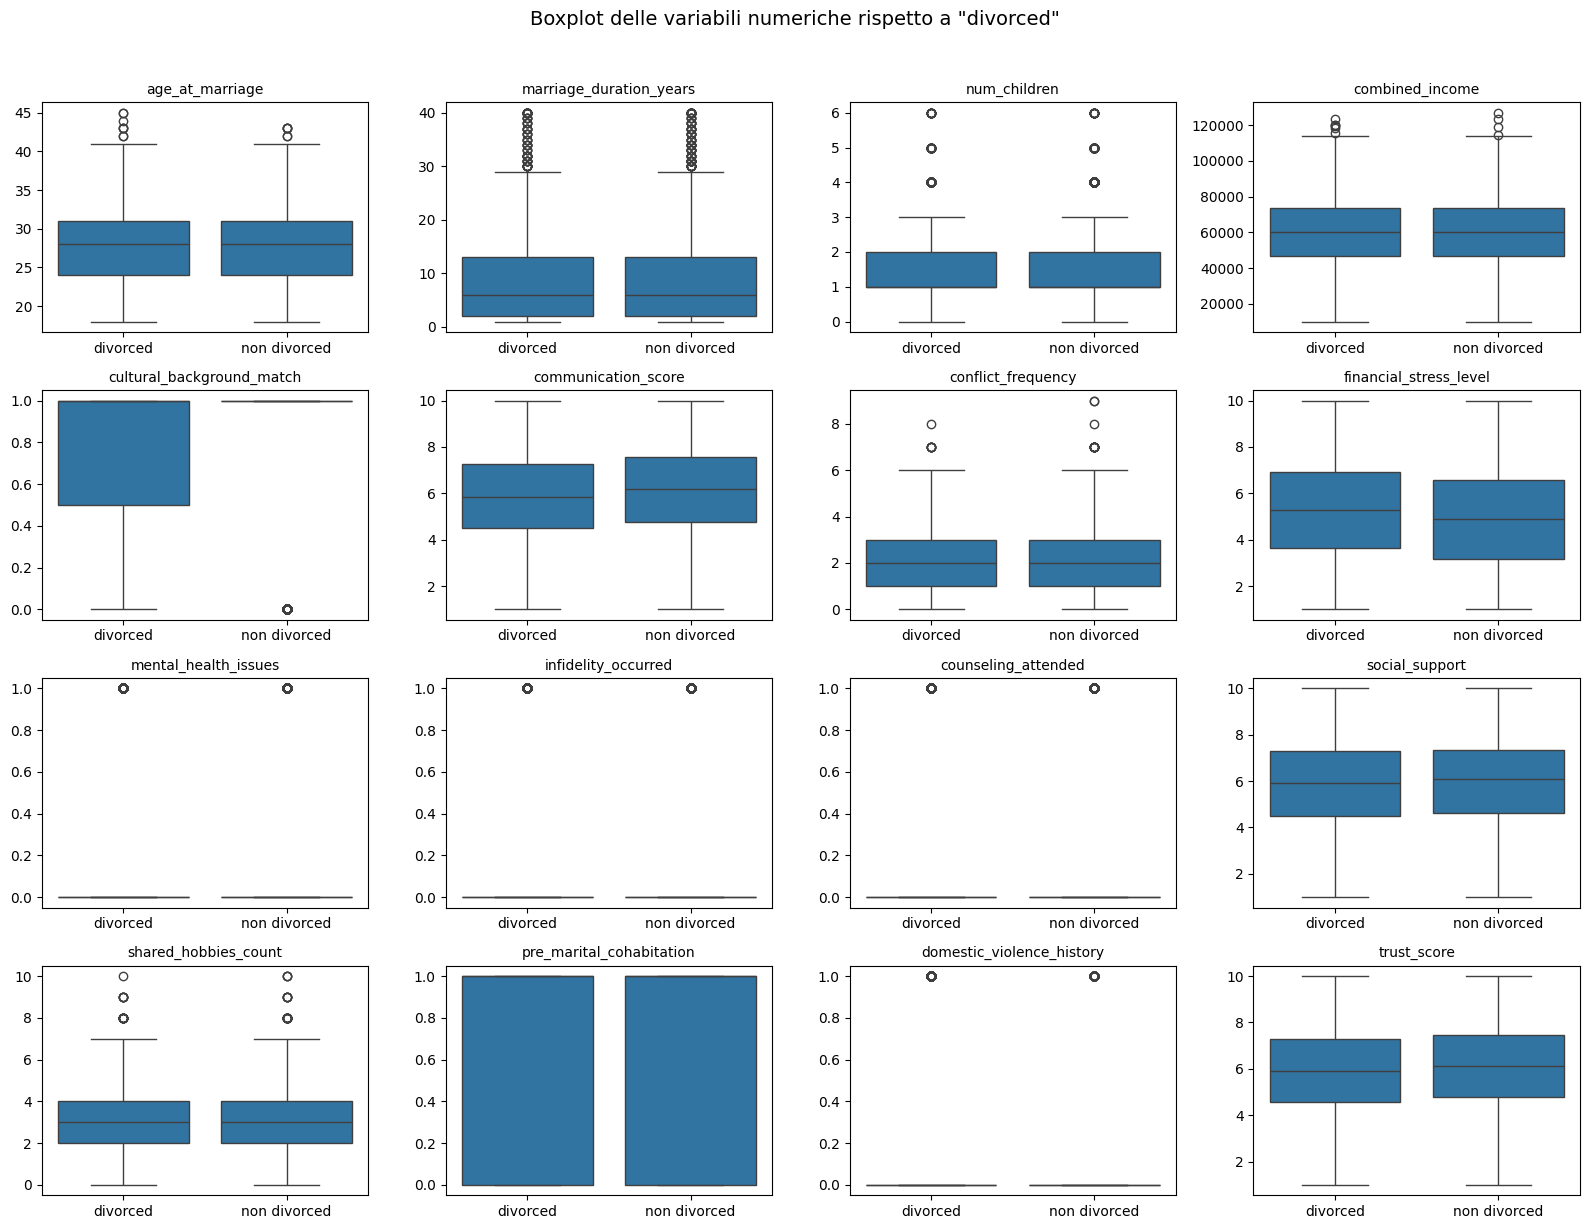

In [ ]:
plot_numeric_boxplots_grid(df, num_cols, 'divorced', 4)

Analizziamo uno ad uno i vari boxplot, evidenziando brevemente ciò che mettono in luce

**Variabili anagrafiche e familiari**

- *age_at_marriage* : abbiamo una distribuzione molto simile tra divorziati e non, per cui l’età al matrimonio non sembra discriminante.

- *marriage_duration_years* : i divorziati mostrano una leggera tendenza a durate più brevi, ma la differenza non è marcata.

- *num_children* : anche qui nessuna differenza rilevante

**Aspetti economici e sociali**

- *combined_income* : le mediane sono molto vicine, ma i divorziati sembrano avere una leggera variabilità maggiore (range più ampio), perciò potrebbe esserci un legame debole con stress finanziario o instabilità economica.

- *financial_stress_level* : i divorziati mostrano una mediana più alta: chi vive più stress economico tende leggermente di più al divorzio. Questa potrebbe essere una variabile potenzialmente predittiva.

- *social_support* : nei divorziati la mediana è più bassa, segno che minore supporto sociale può essere associato a un rischio più alto di divorzio. Questo sembra coerente con la letteratura sociale.

**Aspetti relazionali e psicologici**

- *communication_score* : la mediana dei divorziati è leggermente più bassa. Questa tendenza è sensata poichè una peggior comunicazione può portare ad probabilità più alta di rottura.

- *trust_score* : anche qui i divorziati hanno un trust più basso. C'è quindi un'indicazione di legame tra fiducia e stabilità matrimoniale.

- *conflict_frequency* : i divorziati hanno conflitti più frequenti, con una distribuzione spostata verso l’alto.

**Aspetti di compatibilità e contesto**

- *cultural_background_match*: osserviamo una leggera differenza: i non divorziati sembrano avere maggiore compatibilità culturale. Questo può rappresentare quindi un potenziale fattore di protezione.

- *mental_health_issues* : in questo caso i dati sono molto sbilanciati (molti 0), ma possibile tendenza verso valori leggermente più alti nei divorziati.

- *infidelity_occurred* : la distribuzione mostra che la maggior parte dei divorziati ha avuto episodi di infedeltà (valori 1). Qua abbiamo una forte associazione visiva con il divorzio.

- *counseling_attended* : più frequente tra i divorziati; può indicare tentativi di risolvere problemi prima della rottura.

- *pre_marital_cohabitation*: nessuna differenza evidente, pertanto la convivenza pre-matrimoniale non sembra influire molto.

- *domestic_violence_history* : più frequente nei divorziati; pochi casi, ma l’effetto è netto quando presente.

**Aspetti legati a tempo libero e connessione**
- *shared_hobbies_count*: i divorziati tendono ad avere leggermente meno hobby condivisi. Questo suggerisce che una minore interazione o minori interessi comuni portano un maggiore rischio.

In sintesi:
- Comunicazione, fiducia, conflitto	sembrano essere indicatori chiave.
- Stress economico e supporto sociale sembrano essere fattori secondari ma rilevanti
- Per quanto riguarda infedeltà, violenza, salute mentale possiamo considerarle come fattori critici ma meno frequenti
- Età, figli, convivenza, reddito	sono invece fattori neutri nel dataset

Andiamo a verificare numericamente quanto osservato a prima vista dai boxplot, osservando i valori veri e propri di correlazione tra le feature numeriche e la variabile target

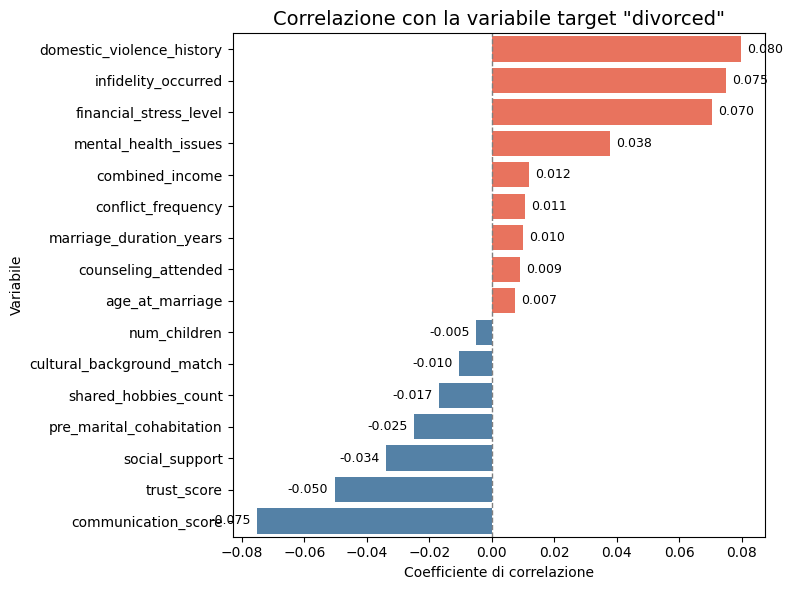

In [ ]:
plot_target_correlations(df)

Osserviamo che le correlazioni, sia positive che negative, non sono molto elevate.
Quelle più significative risultano essere:
- *domestic_violence_history*	(+0.08): leggera correlazione positiva, indica che chi ha episodi di violenza domestica tende un po’ più al divorzio
- *infidelity_occurred*	(+0.07): stesso discorso, ovvero un piccolo effetto, coerente ma debole
- *financial_stress_level*	(+0.07): minima tendenza, sembra indicare che più stress economico porta leggermente a più divorzi

I valori sono in generale molto bassi, ciò significa che nessuna singola variabile spiega da sola il divorzio. Non c’è un fattore lineare dominante, ma la relazione è probabilmente multifattoriale.

## Variabili qualitative
Visualizziamo dei bar chart per ciascuna delle variabili qualitative, per osservare come si distribuiscono rispetto al target 'divorced'

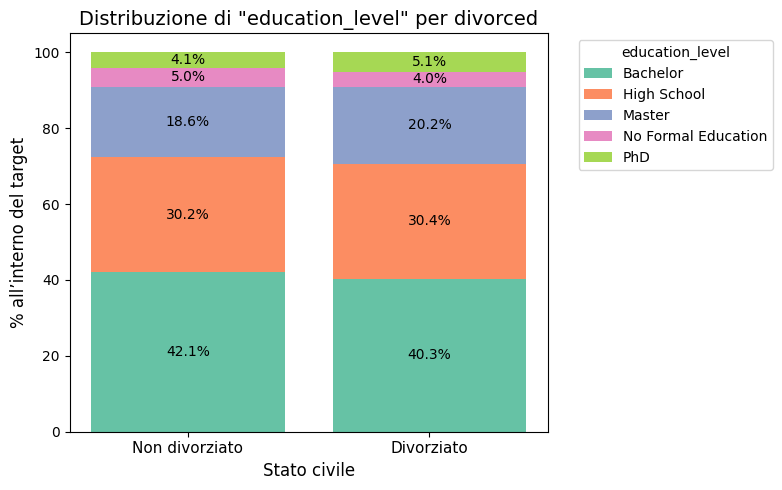

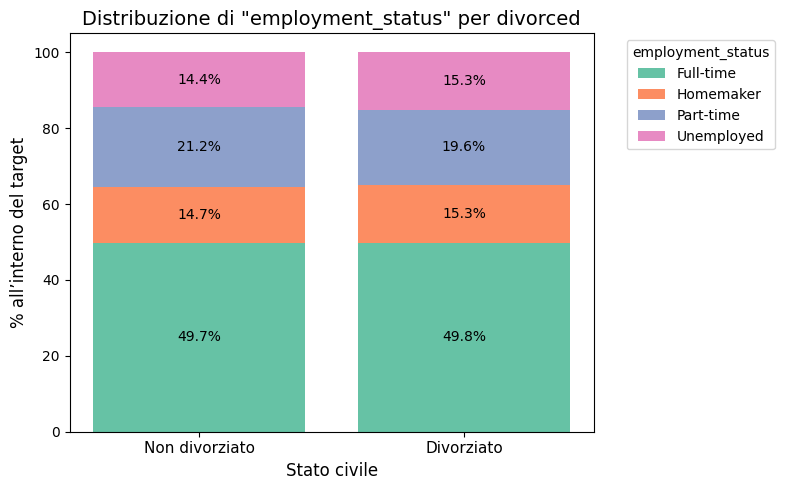

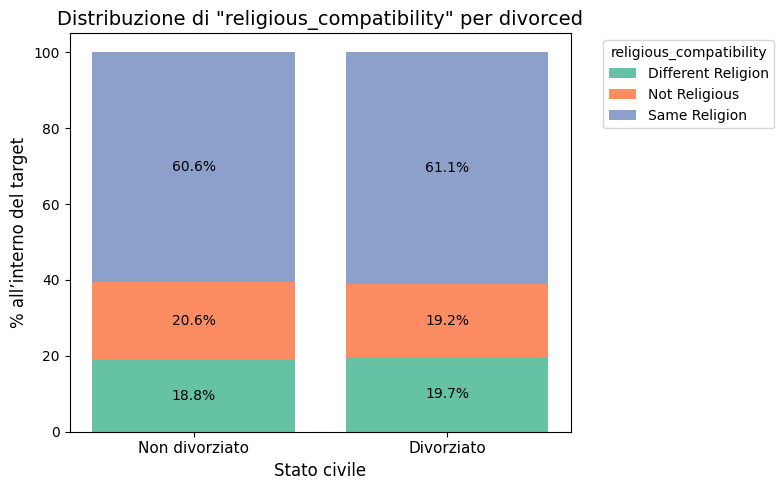

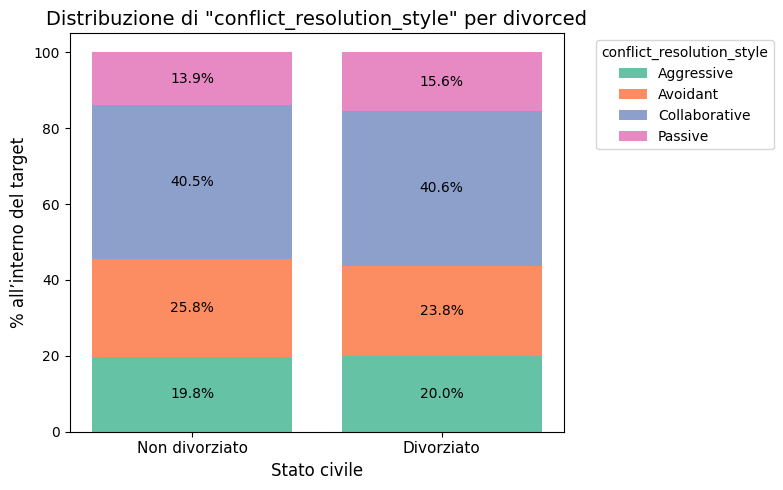

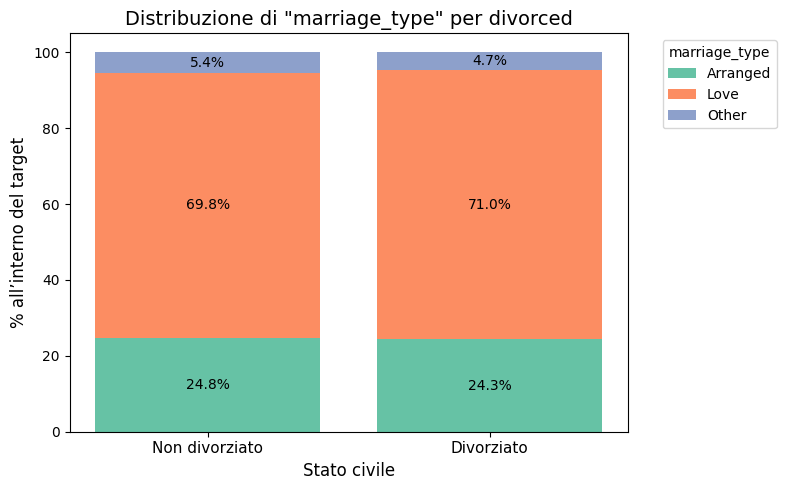

In [ ]:
plot_target_distribution_by_categories(df, cat_cols)

Analizziamo i grafici

- *education_level* : nel complesso si notano poche differenze, le più significative riguardano *Bachelor* che sembra essere un fattore protettivo e *Master* il contrario. Non sembra esserci una correlazione lineare evidente tra livelli di istruzione più alti e divorzio

- *employment_status*: il lavoro part-time sembra essere più protettivo rispetto a lavoro da casa o disoccupazione

- *religious_compatibility* : le coppie non religiose sembrano essere leggermente meno inclini al divorzio

- *conflict_resolution_style* : le coppie con uno stile aggressivo o passivo tendono a divorziare più facilmente rispetto a quelle con stile evitante

- *marriage_type*: non sembrano esserci differenze significative

Anche in questo caso le differenze singole sembrano essere molto lievi

## Conclusioni
Alcune variabili psicologiche e relazionali mostrano differenze coerenti con la letteratura: communication_score, trust_score e conflict_frequency evidenziano pattern attesi, dove una comunicazione più debole, meno fiducia e conflitti frequenti sono associati a un rischio maggiore di divorzio.
Anche i fattori di supporto sociale (social_support) e stress economico (financial_stress_level) mostrano differenze che, seppur deboli, sono abbastanza coerenti con l’idea che la stabilità economica e il sostegno sociale possano avere un ruolo.

Tuttavia le **correlazioni numeriche con il target sono molto basse**, tutte inferiori a ±0.1, il che indica che nessuna variabile singolarmente spiega bene il divorzio. Ciò conferma che il fenomeno è complesso e probabilmente non lineare.

Le variabili qualitative mostrano pattern poco marcati; alcune discrepanze (es. livello di istruzione o stile di risoluzione dei conflitti) sono interessanti ma non generalizzabili senza ulteriori analisi statistiche.

In conclusione, l’analisi conferma che il divorzio non dipende da un singolo fattore facilmente misurabile. Per ottenere modelli predittivi affidabili sarà necessario considerare combinazioni di variabili, relazioni non lineari e probabilmente interazioni tra aspetti psicologici, sociali e comportamentali. In sintesi, la stabilità matrimoniale sembra non essere spiegabile con semplici correlazioni, ma **richiede un approccio più sofisticato e multidimensionale**.